If the data is not missing at random then we use this technique

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [41]:
df = pd.read_csv('titanic_toy.csv')
df.sample(4)

,Age,Fare,Family,Survived
170,61.0,33.5000,0,0
475,NaN,52.0000,0,0
484,25.0,91.0792,1,1
877,19.0,7.8958,0,0


### Using Pandas

In [42]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<AxesSubplot:xlabel='Age', ylabel='Density'>

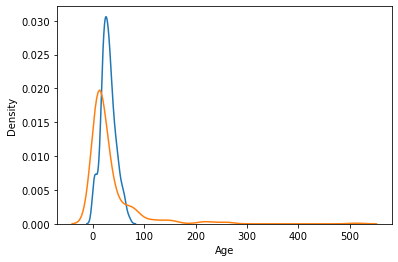

In [44]:
sns.kdeplot(X_train['Age'])

sns.kdeplot(X_train['Fare'])

In [45]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [46]:
X_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [47]:
X_train.isnull().sum()

Age            148
Fare            36
Family           0
Age_99           0
Age_minus1       0
Fare_999         0
Fare_minus1      0
dtype: int64

In [48]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age variance after 99 imputation: ', X_train['Age_99'].var())
print('Age variance after minus1 imputation', X_train['Age_minus1'].var())
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare variance after 999 imputation:  ', X_train['Fare_999'].var())
print('Fare variance after minus1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age variance after 99 imputation:  951.7275570187172
Age variance after minus1 imputation 318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare variance after 999 imputation:   47219.20265217623
Fare variance after minus1 imputation:  2378.5676784883503


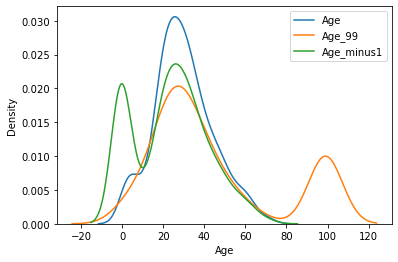

In [49]:
sns.kdeplot(X_train['Age'],label = 'Age')

sns.kdeplot(X_train['Age_99'], label = 'Age_99')

sns.kdeplot(X_train['Age_minus1'], label = 'Age_minus1')

plt.legend()

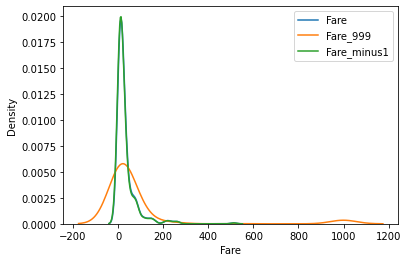

In [50]:
sns.kdeplot(X_train['Fare'],label = 'Fare')

sns.kdeplot(X_train['Fare_999'], label = 'Fare_999')

sns.kdeplot(X_train['Fare_minus1'], label = 'Fare_minus1')

plt.legend()

In [51]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [52]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


<AxesSubplot:>

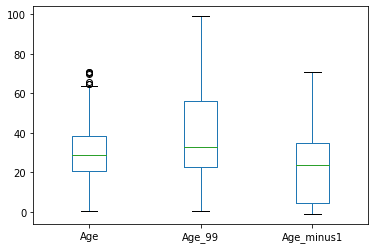

In [55]:
X_train[['Age','Age_99','Age_minus1']].boxplot(grid=False)

<AxesSubplot:>

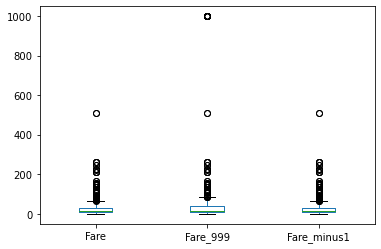

In [56]:
X_train[['Fare','Fare_999','Fare_minus1']].boxplot(grid = False)

### Using sklearn constant imputation

In [57]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [59]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [60]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [61]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [62]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [63]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [71]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])